# Assignment 2 of Data Mining 

In [54]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.preprocessing import StandardScaler, normalize  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score
import graphviz 
from sklearn import metrics


In [2]:
dall = pd.read_csv('fer2018/fer2018.csv')

In [3]:
dall = dall.sample(frac=1)

In [4]:
all_count = dall['emotion'].value_counts()

In [5]:
print(dall['emotion'].value_counts())

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


## Checking the data of the files 

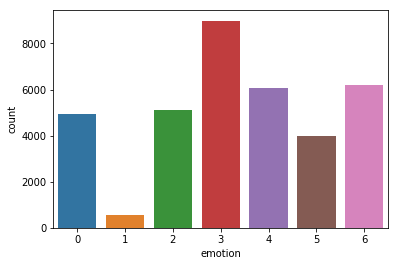

In [6]:
sea.countplot(dall['emotion'])

In [7]:
dall['pixels'].size

35887

## 500 data set values 

In [8]:
dall_0 = dall.loc[dall['emotion'] == 0];
dall0 = dall_0.iloc[0:500]
dall_1 = dall.loc[dall['emotion'] == 1];
dall1 = dall_1.iloc[0:500]
dall_2 = dall.loc[dall['emotion'] == 2];
dall2 = dall_2.iloc[0:500]
dall_3 = dall.loc[dall['emotion'] == 3];
dall3 = dall_3.iloc[0:500]
dall_4 = dall.loc[dall['emotion'] == 4];
dall4 = dall_4.iloc[0:500]
dall_5 = dall.loc[dall['emotion'] == 5];
dall5 = dall_5.iloc[0:500]
dall_6 = dall.loc[dall['emotion'] == 6];
dall6 = dall_6.iloc[0:500]

In [9]:
dall_500 = pd.concat([dall0,dall1,dall2,dall3,dall4,dall5,dall6], ignore_index=True)

In [10]:
dall_500.shape

(3500, 2)

In [11]:
dall_500 = dall_500.sample(frac=1)

## Show Images 

In [12]:
def show_image(i):
    nd = dall['pixels'][i]
    val = nd.split(" ")
    x_pixels = np.array(val, 'float32')
    x_pixels /= 255
    x_reshaped = x_pixels.reshape(48,48)
    plt.imshow(x_reshaped, cmap= "gray", interpolation="nearest")    
    plt.axis("off")
    plt.show()

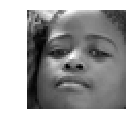

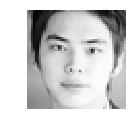

In [13]:
plt.figure(1)
plt.subplot(211)
show_image(102)
plt.subplot(212)
show_image(112)

In [14]:
NUM_CLASSES = 7
img_size = 48

## Preproccessing Dataset  

In [15]:
def pandas_vector_to_list(pandas_df):
    py_list = [item for item in pandas_df.values.tolist()]
    return py_list

In [16]:
def em_as_list(dall):
    emotion_as_list = pandas_vector_to_list(dall)
    y_data = []
    for index in range(len(dall)):
        y_data.append(emotion_as_list[index])
    
    return y_data, emotion_as_list

In [17]:
def np_image_data(x):
    np_image_da = []
    for index, item in enumerate(x):
        # split space separated ints
        pixel_data = item.split()
        np_image_da.append(np.array(pixel_data))
    np_image_da = np.array(np_image_da)
    np_image_da = np_image_da.astype('float32') / 255.0

    return np_image_da

In [18]:
def emotion_data_array(x):
    emotion_da = pandas_vector_to_list(x)
    y_data_da = []
    for index in range(len(x)):
        y_data_da.append(emotion_da[index])
    my_data_da = np.asarray(y_data_da) 
    return my_data_da

In [19]:
def scalar_Transform(np_image_array, y_data):

    X_train500, X_test500, y_train500, y_test500 = train_test_split(np_image_array, y_data, test_size=0.20)
    scaler = StandardScaler()  
    scaler.fit(X_train500)

    X_train500 = scaler.transform(X_train500)  
    X_test500 = scaler.transform(X_test500) 
    return X_train500, X_test500, y_train500, y_test500

In [20]:
np_image_array1 = np_image_data(dall_500['pixels'])

In [21]:
np_image_array = np_image_data(dall['pixels'])

In [22]:
y_data1, emotion500_as_list = em_as_list(dall_500['emotion'])

In [23]:
y_data, emotion_as_list = em_as_list(dall['emotion'])

In [24]:
X_train500, X_test500, y_train500, y_test500 = scalar_Transform(np_image_array, y_data)

In [25]:
X_train500, X_test500, y_train500, y_test500 = scalar_Transform(np_image_array1, y_data1)

In [26]:
X_train, X_test, y_train, y_test = scalar_Transform(np_image_array, y_data)

## Reading all the other datasets 

In [27]:
da = pd.read_csv('fer2018/fer2018angry.csv')
dd = pd.read_csv('fer2018/fer2018disgust.csv')
df = pd.read_csv('fer2018/fer2018fear.csv')
dh = pd.read_csv('fer2018/fer2018happy.csv')
dn = pd.read_csv('fer2018/fer2018neutral.csv')
ds = pd.read_csv('fer2018/fer2018sad.csv')
dsu = pd.read_csv('fer2018/fer2018surprise.csv')

In [28]:
my_data_da = emotion_data_array(da['emotion'])
my_data_dd = emotion_data_array(dd['emotion'])
my_data_df = emotion_data_array(df['emotion'])
my_data_dh = emotion_data_array(dh['emotion'])
my_data_dn = emotion_data_array(dn['emotion'])
my_data_ds = emotion_data_array(ds['emotion'])
my_data_dsu = emotion_data_array(dsu['emotion'])


## Getting the best Pixels of the datasets 

In [29]:
np_image_da = np_image_data(da['pixels'])
np_image_dd = np_image_data(dd['pixels'])
np_image_df = np_image_data(df['pixels'])
np_image_dh = np_image_data(dh['pixels'])
np_image_dn = np_image_data(dn['pixels'])
np_image_ds = np_image_data(ds['pixels'])
np_image_dsu = np_image_data(dsu['pixels'])

In [30]:
import scipy as sp
from scipy.stats import pearsonr

In [31]:
myarray = np.asarray(y_data)

In [32]:
def correlation_data(x, y):
    prob_cluster_da = []

    for i in range(y.shape[1]):  
        k = pearsonr(x,y[:,i])
        prob_cluster_da.append(k[0])
        
    return prob_cluster_da

In [33]:
prob_cluster_da = np.array(correlation_data(my_data_da,np_image_da))
prob_cluster_dd = np.array(correlation_data(my_data_dd,np_image_dd))
prob_cluster_df = np.array(correlation_data(my_data_df,np_image_df))
prob_cluster_dh = np.array(correlation_data(my_data_dh,np_image_dh))
prob_cluster_ds = np.array(correlation_data(my_data_ds,np_image_ds))
prob_cluster_dsu = np.array(correlation_data(my_data_dsu,np_image_dsu))

In [34]:
def top_values(x,num):
    
    top_idx = np.argsort(x)[-num:]
    top_values = [x[i] for i in top_idx]
    top_idx = np.flip(top_idx,axis=0)
    
    return(top_idx, top_values)

## DecisionTreeClassifier with complete dataset

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [97]:
dy = DecisionTreeClassifier()
clf = dy.fit(X_train,y_train)

In [101]:
clf1 = dy.fit(X_train500,y_train500)

In [110]:
edges

defaultdict(list,
            {'0': [1],
             '1': [2, 57],
             '2': [3, 52],
             '3': [4, 51],
             '4': [5, 14],
             '5': [6, 9],
             '6': [7, 8],
             '9': [10, 11],
             '11': [12, 13],
             '14': [15, 16],
             '16': [17, 46],
             '17': [18, 31],
             '18': [19, 22],
             '19': [20, 21],
             '22': [23, 30],
             '23': [24, 29],
             '24': [25, 26],
             '26': [27, 28],
             '31': [32, 43],
             '32': [33, 42],
             '33': [34, 35],
             '35': [36, 41],
             '36': [37, 38],
             '38': [39, 40],
             '43': [44, 45],
             '46': [47, 48],
             '48': [49, 50],
             '52': [53, 56],
             '53': [54, 55],
             '57': [58],
             '58': [59],
             '59': [60],
             '60': [61, 88],
             '61': [62, 73],
             '62': [63, 70],


In [109]:
import pydotplus
import collections

dot_data = tree.export_graphviz(clf1,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list()[0:10]:
    edges[edge.get_source()].append(int(edge.get_destination()))
    


for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

IndexError: list index out of range

### Cross Validation 5 and 10

In [40]:
scores = cross_val_score(dy, X_train, y_train, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.31255441 0.29932091 0.30419641 0.31057307 0.30318871]
Accuracy: 0.31 (+/- 0.01)


In [54]:
scores = cross_val_score(dy, X_train, y_train, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.32370345 0.30525583 0.32509572 0.32126697 0.30745125 0.31114983
 0.32299652 0.31707317 0.30892608 0.3125218 ]
Accuracy: 0.32 (+/- 0.01)


In [55]:
scores = cross_val_score(dy, X_train500, y_train500, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.20781528 0.2228164  0.24150268 0.22182469 0.2311828 ]
Accuracy: 0.23 (+/- 0.02)


In [56]:
scores = cross_val_score(dy, X_train500, y_train500, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.29328622 0.20141343 0.20640569 0.20284698 0.20640569 0.25
 0.23021583 0.23021583 0.19064748 0.22382671]
Accuracy: 0.22 (+/- 0.06)


In [46]:
clf500 = dy.fit(X_train500,y_train500)

https://scikit-learn.org/stable/modules/tree.html#tree

### Linear Model 

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [37]:
L_R = LinearRegression()
Ridge = RidgeCV()

### Two types of data set 

In [38]:
L_R.fit(X_train, y_train)
y_test_predict = L_R.predict(X_test)

In [50]:
round(y_test_predict[50])

-4.0

In [45]:
print(metrics.classification_report(y_test, np.round(y_test_predict)))
print(metrics.confusion_matrix(y_test,np.round(y_test_predict)))

             precision    recall  f1-score   support

       -1.0       0.00      0.00      0.00         0
        0.0       0.29      0.00      0.00       987
        1.0       0.06      0.04      0.05        95
        2.0       0.16      0.12      0.13      1046
        3.0       0.29      0.55      0.38      1830
        4.0       0.16      0.35      0.22      1168
        5.0       0.27      0.12      0.17       788
        6.0       0.28      0.01      0.01      1264
        8.0       0.00      0.00      0.00         0

avg / total       0.24      0.23      0.17      7178

[[   0    0    0    0    0    0    0    0    0]
 [   2    2   16  144  531  262   29    1    0]
 [   0    0    4   12   53   23    3    0    0]
 [   0    3   15  124  501  352   49    2    0]
 [   0    2   14  245 1005  512   49    3    0]
 [   0    0   10  117  589  406   39    7    0]
 [   0    0    1   50  263  374   94    5    1]
 [   0    0    7  103  530  532   85    7    0]
 [   0    0    0    0    0    

/home/mohit/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [46]:
L_R.fit(X_train500, y_train500)
y_test_predict = L_R.predict(X_test500)

In [47]:
print(metrics.classification_report(y_test500, np.round(y_test_predict)))
print(metrics.confusion_matrix(y_test500,np.round(y_test_predict)))

             precision    recall  f1-score   support

      -15.0       0.00      0.00      0.00         0
      -13.0       0.00      0.00      0.00         0
      -12.0       0.00      0.00      0.00         0
      -11.0       0.00      0.00      0.00         0
      -10.0       0.00      0.00      0.00         0
       -9.0       0.00      0.00      0.00         0
       -8.0       0.00      0.00      0.00         0
       -7.0       0.00      0.00      0.00         0
       -6.0       0.00      0.00      0.00         0
       -5.0       0.00      0.00      0.00         0
       -4.0       0.00      0.00      0.00         0
       -3.0       0.00      0.00      0.00         0
       -2.0       0.00      0.00      0.00         0
       -1.0       0.00      0.00      0.00         0
        0.0       0.09      0.05      0.06       103
        1.0       0.27      0.16      0.20       100
        2.0       0.15      0.10      0.12       101
        3.0       0.14      0.09      0.11   

/home/mohit/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [51]:
Ridge.fit(X_train, y_train)
y_test_predict = Ridge.predict(X_test)

In [59]:
y_test_predict.shape

(7178,)

In [78]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(np.array(y_test_predict))
transformer.transform(np.array(y_test_predict))

ValueError: Expected 2D array, got 1D array instead:
array=[2.35669366 2.18377694 3.17015594 ... 2.48393429 4.75927317 4.43226763].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [77]:
np.linalg.norm(y_test_predict,axis=0, keepdims=True)

array([287.75136943])

In [79]:
np.array(y_test_predict).shape

(7178,)

In [71]:
y_test_predict = normalize(y_test_predict, norm='l2')

ValueError: Expected 2D array, got 1D array instead:
array=[2.35669366 2.18377694 3.17015594 ... 2.48393429 4.75927317 4.43226763].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [52]:
print(metrics.classification_report(y_test, np.round(y_test_predict)))
print(metrics.confusion_matrix(y_test, np.round(y_test_predict)))

             precision    recall  f1-score   support

       -1.0       0.00      0.00      0.00         0
        0.0       0.40      0.00      0.00       987
        1.0       0.07      0.04      0.05        95
        2.0       0.16      0.12      0.13      1046
        3.0       0.29      0.56      0.38      1830
        4.0       0.16      0.35      0.22      1168
        5.0       0.28      0.12      0.17       788
        6.0       0.27      0.01      0.01      1264
        8.0       0.00      0.00      0.00         0

avg / total       0.26      0.23      0.17      7178

[[   0    0    0    0    0    0    0    0    0]
 [   2    2   13  144  537  259   29    1    0]
 [   0    0    4   12   53   24    2    0    0]
 [   0    2   14  122  506  354   45    3    0]
 [   0    1   12  236 1020  513   45    3    0]
 [   0    0    6  111  601  407   35    8    0]
 [   0    0    1   49  260  380   93    4    1]
 [   0    0    6   98  537  536   80    7    0]
 [   0    0    0    0    0    

/home/mohit/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [80]:
Ridge.fit(X_train500, y_train500)
y_test_predict = Ridge.predict(X_test500)

In [82]:
print(metrics.classification_report(y_test500, np.round(y_test_predict)))
print(metrics.confusion_matrix(y_test500,np.round(y_test_predict)))

             precision    recall  f1-score   support

       -3.0       0.00      0.00      0.00         0
       -2.0       0.00      0.00      0.00         0
       -1.0       0.00      0.00      0.00         0
        0.0       0.14      0.05      0.07       103
        1.0       0.28      0.22      0.25       100
        2.0       0.16      0.20      0.18       101
        3.0       0.17      0.30      0.21        96
        4.0       0.15      0.17      0.16       111
        5.0       0.23      0.16      0.19        93
        6.0       0.17      0.07      0.10        96
        7.0       0.00      0.00      0.00         0
        8.0       0.00      0.00      0.00         0
        9.0       0.00      0.00      0.00         0
       11.0       0.00      0.00      0.00         0

avg / total       0.18      0.17      0.17       700

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  3  5 

/home/mohit/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Decision tree regression

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html#sphx-glr-auto-examples-tree-plot-tree-regression-multioutput-py

In [83]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)

In [84]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [89]:
y_test_predict = regr_1.predict(X_test)
print(metrics.classification_report(y_test, np.round(y_test_predict)))
print(metrics.confusion_matrix(y_test,np.round(y_test_predict)))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       987
          1       0.00      0.00      0.00        95
          2       0.00      0.00      0.00      1046
          3       0.27      0.85      0.41      1830
          4       0.12      0.14      0.13      1168
          5       0.00      0.00      0.00       788
          6       0.00      0.00      0.00      1264

avg / total       0.09      0.24      0.13      7178

[[   0    0    0  848  139    0    0]
 [   0    0    0   81   14    0    0]
 [   0    0    0  798  248    0    0]
 [   0    0    0 1554  276    0    0]
 [   0    0    0 1001  167    0    0]
 [   0    0    0  492  296    0    0]
 [   0    0    0  956  308    0    0]]


/home/mohit/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [86]:
y_test_predict = regr_2.predict(X_test)
print(metrics.classification_report(y_test, (y_test_predict)))
print(metrics.confusion_matrix(y_test,(y_test_predict)))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       987
          1       0.00      0.00      0.00        95
          2       0.16      0.03      0.05      1046
          3       0.28      0.70      0.40      1830
          4       0.16      0.33      0.22      1168
          5       0.00      0.00      0.00       788
          6       0.00      0.00      0.00      1264

avg / total       0.12      0.24      0.14      7178

[[   0    1   42  685  259    0    0]
 [   0    0    2   75   18    0    0]
 [   0    1   32  669  344    0    0]
 [   0    1   63 1276  490    0    0]
 [   0    2   34  747  385    0    0]
 [   0    0   12  407  369    0    0]
 [   0    1   16  707  540    0    0]]


/home/mohit/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [90]:
y_test_predict = regr_3.predict(X_test)
print(metrics.classification_report(y_test, np.round(y_test_predict)))
print(metrics.confusion_matrix(y_test,np.round(y_test_predict)))

             precision    recall  f1-score   support

          0       0.30      0.02      0.03       987
          1       0.04      0.04      0.04        95
          2       0.15      0.07      0.10      1046
          3       0.29      0.60      0.39      1830
          4       0.16      0.32      0.22      1168
          5       0.21      0.10      0.13       788
          6       0.38      0.01      0.01      1264

avg / total       0.25      0.23      0.17      7178

[[  18   35   90  545  252   43    4]
 [   0    4   11   58   20    2    0]
 [   6   17   76  572  321   51    3]
 [  13   22  155 1106  484   47    3]
 [  13   14   84  636  372   47    2]
 [   3    5   30  344  328   75    3]
 [   7   16   75  573  486   98    9]]


In [91]:
regr_1.fit(X_train500, y_train500)
regr_2.fit(X_train500, y_train500)
regr_3.fit(X_train500, y_train500)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [93]:
y_test_predict = regr_1.predict(X_test500)
print(metrics.classification_report(y_test500, np.round(y_test_predict)))
print(metrics.confusion_matrix(y_test500,np.round(y_test_predict)))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       103
          1       0.00      0.00      0.00       100
          2       0.21      0.16      0.18       101
          3       0.16      0.77      0.26        96
          4       0.15      0.22      0.18       111
          5       0.00      0.00      0.00        93
          6       0.00      0.00      0.00        96

avg / total       0.08      0.16      0.09       700

[[ 0  0 15 74 14  0  0]
 [ 0  0 16 64 20  0  0]
 [ 0  0 16 65 20  0  0]
 [ 0  0  6 74 16  0  0]
 [ 0  0  8 79 24  0  0]
 [ 0  0 10 48 35  0  0]
 [ 0  0  6 64 26  0  0]]


/home/mohit/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [94]:
y_test_predict = regr_2.predict(X_test500)
print(metrics.classification_report(y_test500, np.round(y_test_predict)))
print(metrics.confusion_matrix(y_test500,np.round(y_test_predict)))

             precision    recall  f1-score   support

          0       1.00      0.01      0.02       103
          1       0.16      0.05      0.08       100
          2       0.17      0.09      0.12       101
          3       0.15      0.74      0.25        96
          4       0.18      0.21      0.19       111
          5       0.00      0.00      0.00        93
          6       0.00      0.00      0.00        96

avg / total       0.24      0.16      0.10       700

[[ 1  7 11 73 10  0  1]
 [ 0  5 11 71 13  0  0]
 [ 0  7  9 64 19  2  0]
 [ 0  1  5 71 16  1  2]
 [ 0  3  8 76 23  0  1]
 [ 0  4  4 51 32  0  2]
 [ 0  4  4 69 17  2  0]]


In [95]:
y_test_predict = regr_3.predict(X_test500)
print(metrics.classification_report(y_test500, np.round(y_test_predict)))
print(metrics.confusion_matrix(y_test500,np.round(y_test_predict)))

             precision    recall  f1-score   support

          0       0.38      0.08      0.13       103
          1       0.36      0.15      0.21       100
          2       0.13      0.11      0.12       101
          3       0.16      0.55      0.25        96
          4       0.15      0.16      0.16       111
          5       0.28      0.25      0.26        93
          6       0.06      0.01      0.02        96

avg / total       0.22      0.18      0.16       700

[[ 8  9 14 46 15  7  4]
 [ 1 15 10 55 10  8  1]
 [ 5  5 11 48 16 13  3]
 [ 0  2 12 53 17  8  4]
 [ 2  4 16 57 18 11  3]
 [ 4  4  9 34 18 23  1]
 [ 1  3 12 41 27 11  1]]


###  Keras Model

In [ ]:
import sys, os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [ ]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 100
width, height = 48, 48

In [ ]:
dataK = pd.read_csv('fer2018/fer2018.csv')

In [ ]:
pixels = dataK['pixels'].tolist() 

faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')] 
    face = np.asarray(face).reshape(width, height) 
    faces.append(face.astype('float32'))

faces = np.asarray(faces)
faces = np.expand_dims(faces, -1) 

emotions = pd.get_dummies(dataK['emotion']).as_matrix() 

In [ ]:
XK_train, XK_test, yK_train, yK_test = train_test_split(faces, emotions, test_size=0.15, random_state=42)
XK_train, XK_val, yK_train, yK_val = train_test_split(XK_train, yK_train, test_size=0.15, random_state=41)

In [ ]:
modelK = Sequential()

modelK.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
modelK.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
modelK.add(BatchNormalization())
modelK.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
modelK.add(Dropout(0.5))

modelK.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
modelK.add(BatchNormalization())
modelK.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
modelK.add(BatchNormalization())
modelK.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
modelK.add(Dropout(0.5))

modelK.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
modelK.add(BatchNormalization())
modelK.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
modelK.add(BatchNormalization())
modelK.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
modelK.add(Dropout(0.5))

modelK.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
modelK.add(BatchNormalization())
modelK.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
modelK.add(BatchNormalization())
modelK.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
modelK.add(Dropout(0.5))

modelK.add(Flatten())

modelK.add(Dense(2*2*2*num_features, activation='relu'))
modelK.add(Dropout(0.4))
modelK.add(Dense(2*2*num_features, activation='relu'))
modelK.add(Dropout(0.4))
modelK.add(Dense(2*num_features, activation='relu'))
modelK.add(Dropout(0.5))

modelK.add(Dense(num_labels, activation='softmax'))

In [ ]:
modelK.summary()

In [ ]:
modelK.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

In [ ]:
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')

In [ ]:
MODELPATH = './model.h5'
checkpointer = ModelCheckpoint(MODELPATH, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
tensorboard = TensorBoard(log_dir='./logs')

In [ ]:
modelK.fit(np.array(XK_train), np.array(yK_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(XK_test), np.array(yK_test)),
          shuffle=True,
          callbacks=[lr_reducer, tensorboard, early_stopper, checkpointer])

In [ ]:
scores = modelK.evaluate(np.array(XK_test), np.array(yK_test), batch_size=batch_size)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

In [ ]:
scores1 = modelK.evaluate(np.array(XK_train), np.array(yK_train), batch_size=batch_size)
print("Loss: " + str(scores1[0]))
print("Accuracy: " + str(scores1[1]))